https://www.hackster.io/mjrobot/rpi-physical-computing-using-jupyter-notebook-056fa8

$ sudo apt-get install python-opencv python-scipy python-numpy python3-matplotlib

In [1]:
import sys

In [2]:
sys.version

'3.5.3 (default, Jan 19 2017, 14:11:04) \n[GCC 6.3.0 20170124]'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import numpy as np

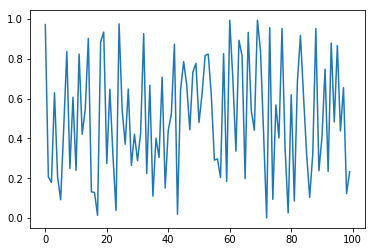

In [5]:
plt.plot(np.random.sample(100));

We can use the picamera library rather than faff with openCV

In [6]:
import picamera
camera = picamera.PiCamera() 
camera.vflip = True

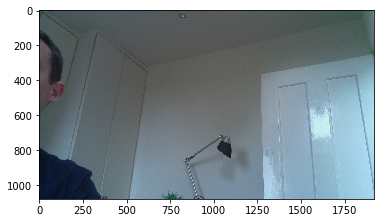

In [22]:
file_name = 'img.jpg'
camera.capture(file_name)
img = plt.imread(file_name)
plt.imshow(img);

Lets use the pantilt_hat https://github.com/pimoroni/pantilt-hat

Can pan/tilt +/- 90 degrees

In [9]:
import pantilthat

In [11]:
pantilthat.__version__

'0.0.6'

In [19]:
pantilthat.pan(-90)

In [20]:
pantilthat.get_pan()

-90

In [21]:
pantilthat.get_tilt()

0

Lets use jupyter widgets to create a control panel: note I didn't have to install anything

In [23]:
from ipywidgets import interact

In [42]:
from IPython.display import display

In [24]:
import ipywidgets as widgets

In [35]:
def f(x, y):
    pantilthat.pan(x)
    pantilthat.tilt(y)
    return x, y

interactive(children=(IntSlider(value=-90, description='x', max=90, min=-90, step=5), IntSlider(value=0, descr…

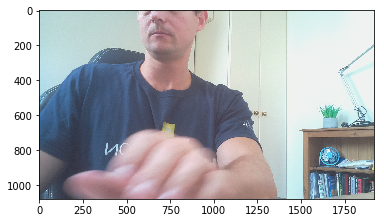

In [41]:
interact(f, x=widgets.IntSlider(min=-90, max=90, step=5, value=-90),
            y=widgets.IntSlider(min=-90, max=90, step=5, value=0))

plt.figure(2)
plt.imshow(img)

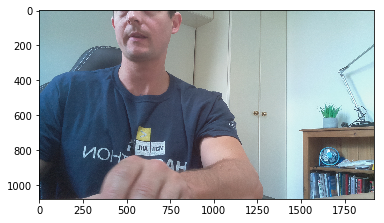

In [58]:
my_obj = plt.imshow(img)

def on_button_clicked(b):
    """Callback for on button clicked."""
    print('Snapped!')
    camera.capture(file_name)
    img = plt.imread(file_name)
    my_obj.draw(img)

In [59]:
button = widgets.Button(description='Snap!')
display(button)

button.on_click(on_button_clicked)

Button(description='Snap!', style=ButtonStyle())

Snapped!


AttributeError: 'numpy.ndarray' object has no attribute 'new_gc'

Theres projects online specifically for displaying camera feeds in Jupyter, keep an eye on those